### Import the Necessary Libraries

In [35]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

### Twitter API credentials

In [67]:
#Please generate your own keys from the twitter Developer API Account. 

consumer_key  = '************'

consumer_secret = '**********************'

Bearertoken = "************************"

access_token = '***********************'

access_token_secret = '***********************'

### Creating the Authentication

In [37]:
authenticate = tweepy.OAuthHandler(consumer_key, consumer_secret)

# setting the access token and secret access token
authenticate.set_access_token(access_token, access_token_secret)

# create the API object while passing the Information
api = tweepy.API(authenticate, wait_on_rate_limit= True)

### Extracting Tweets from Twitter

In [38]:
posts = api.user_timeline(screen_name = "uber", count=1000, lang="en", tweet_mode="extended")

#printing the tweets to have a look at it.

print("Show the 5 recent tweets: \n")
i=1
for tweet in posts[0:6]:
    print(str(i) + ') ' + tweet.full_text + '\n')
    i += 1

Unexpected parameter: lang


Show the 5 recent tweets: 

1) @Jasim68843440 Hi, we understand you're facing an issue with the fare of this trip. We'll be happy to take a closer look at this. Please share your registered phone number via Direct Message. We'll follow up. https://t.co/wuYI29eNE2

2) @imcjdotin Hi, sorry to hear about the trouble. Please clear the cache on your phone and then reinstall the app for a quick fix. Go to phone Settings&gt; Tap on 'Apps'&gt; Select Uber app&gt; On the App Info interface, tap on 'Storage'&gt; Tap on 'Clear Cache'. Do let us know if the issue persists.

3) @MdIqrarkgn Hey, we have addressed your concern and sent a response your way. Please check the in-app Help section. Appreciate your understanding.

4) @nikhilchhajar Hi, sorry to hear about the trouble. If there is any specific trip that you'd like to report, please send across your phone number via Direct Message along with the date and time of the trip. We'll get this addressed. https://t.co/wuYI29eNE2

5) Words cannot esp

In [39]:
### lets create a dataframe with a column called tweets.

df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

#show the first 5 rows of data.
df.head()

,Tweets
0,"@Jasim68843440 Hi, we understand you're facing..."
1,"@imcjdotin Hi, sorry to hear about the trouble..."
2,"@MdIqrarkgn Hey, we have addressed your concer..."
3,"@nikhilchhajar Hi, sorry to hear about the tro..."
4,Words cannot espresso how much this made us sm...


### Cleaning the text in the data

In [40]:
#creating the fucntion which cleans the data for us.
def cleanText(text):
    text=re.sub(r'@[A-Za-z0-9]+', '', text) #Removes @mention in the tweets
    text = re.sub(r'#', '', text) #removing the hashtag symbol
    text =re.sub(r'RT[\s]+', '', text) # removing retweets
    text = re.sub(r'https?:\/\/\S+', '', text) # Remove the hyper link
    
    return text

df['Tweets'] = df['Tweets'].apply(cleanText)

#showing the clean tweets in the data
df

,Tweets
0,"Hi, we understand you're facing an issue with..."
1,"Hi, sorry to hear about the trouble. Please c..."
2,"Hey, we have addressed your concern and sent ..."
3,"Hi, sorry to hear about the trouble. If there..."
4,Words cannot espresso how much this made us sm...
...,...
195,___ 🙏
196,"_Reddy_ Hi, sorry to hear about the trouble. C..."
197,"_Muntha Hi, sorry to hear about the trouble. C..."
198,"_bakshi Hi, sorry to hear about the trouble. C..."


In [41]:
#create a fucntion to get the subjectivity
def getsubject(text):
    return TextBlob(text).sentiment.subjectivity

#fucntion to get polarity
def getpolarity(text):
    return TextBlob(text).sentiment.polarity

# creating extra columns
df['Subjectivity'] = df['Tweets'].apply(getsubject)
df['Polarity'] = df['Tweets'].apply(getpolarity)

#lets see our new Dataframe
df

,Tweets,Subjectivity,Polarity
0,"Hi, we understand you're facing an issue with...",0.700000,0.450000
1,"Hi, sorry to hear about the trouble. Please c...",0.493333,-0.033333
2,"Hey, we have addressed your concern and sent ...",0.000000,0.000000
3,"Hi, sorry to hear about the trouble. If there...",0.431250,-0.150000
4,Words cannot espresso how much this made us sm...,0.150000,0.250000
...,...,...,...
195,___ 🙏,0.000000,0.000000
196,"_Reddy_ Hi, sorry to hear about the trouble. C...",0.533333,-0.200000
197,"_Muntha Hi, sorry to hear about the trouble. C...",0.533333,-0.200000
198,"_bakshi Hi, sorry to hear about the trouble. C...",0.533333,-0.200000


### Plotting the Word Cloud

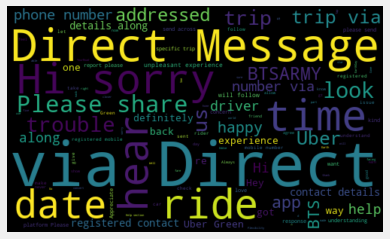

In [42]:
allwords = ' '.join([tweet for tweet in df['Tweets']])

wordCloud = WordCloud(width =500, height =300, random_state=21, max_font_size=119).generate(allwords)

plt.imshow(wordCloud, interpolation= "bilinear")
plt.axis('off') #remove the axis
plt.show()

In [43]:
### Create a fucntion where it computes the negative, positive, neutral analysis.
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)

#show the df
df

,Tweets,Subjectivity,Polarity,Analysis
0,"Hi, we understand you're facing an issue with...",0.700000,0.450000,Positive
1,"Hi, sorry to hear about the trouble. Please c...",0.493333,-0.033333,Negative
2,"Hey, we have addressed your concern and sent ...",0.000000,0.000000,Neutral
3,"Hi, sorry to hear about the trouble. If there...",0.431250,-0.150000,Negative
4,Words cannot espresso how much this made us sm...,0.150000,0.250000,Positive
...,...,...,...,...
195,___ 🙏,0.000000,0.000000,Neutral
196,"_Reddy_ Hi, sorry to hear about the trouble. C...",0.533333,-0.200000,Negative
197,"_Muntha Hi, sorry to hear about the trouble. C...",0.533333,-0.200000,Negative
198,"_bakshi Hi, sorry to hear about the trouble. C...",0.533333,-0.200000,Negative


### Print all the positive tweets

In [45]:


j=1
sortedDf = df.sort_values(by=['Polarity'])
for i in range(0, sortedDf.shape[0]):
    if (sortedDf['Analysis'][i] == "Positive"):
        print(str(j)  + sortedDf['Tweets'][i])
        print()
        j += 1

1 Hi, we understand you're facing an issue with the fare of this trip. We'll be happy to take a closer look at this. Please share your registered phone number via Direct Message. We'll follow up. 

2Words cannot espresso how much this made us smile  😁☕️🌴 

3 Love this a latte ☕️🌴

4_mary That's awesome! We're glad Charlie loves it as well 🐶

5 10/10! (and Happy Taurus Szn!) 

6 Well, our legal is at Coachella today… let the games begin!! 🤣

7 Seconded Chris' ring ride idea! 😲🚀  pretty please?

8 Thrilled to be in this generation. 😅😆

9 Today's the big day! Happy 🌏 Day from this earthling! EarthDay2022

10 Hey Raghu, we've addressed your concern and sent a response your way. You should be able to view the details via Direct Message. Appreciate your understanding.

11 *Sigh* Ok fine, it's me. 🙋

12Go Anywhere on EarthDay  🌱 🌎

When you request a ride with Uber Green in LA, DC, or Miami on 4/22, lucky riders will have the chance to enjoy an impromptu adventure:  

13 Get home safely frien

### Print all the negative tweets

In [46]:
j = 1
sortedDf = df.sort_values(by=['Polarity'], ascending='False')
for i in range(0, sortedDf.shape[0]):
    if(sortedDf['Analysis'][i] == "Negative"):
        print(str(j) + ") " + sortedDf['Tweets'][i])
        print()
        j += 1
        

1)  Hi, sorry to hear about the trouble. Please clear the cache on your phone and then reinstall the app for a quick fix. Go to phone Settings&gt; Tap on 'Apps'&gt; Select Uber app&gt; On the App Info interface, tap on 'Storage'&gt; Tap on 'Clear Cache'. Do let us know if the issue persists.

2)  Hi, sorry to hear about the trouble. If there is any specific trip that you'd like to report, please send across your phone number via Direct Message along with the date and time of the trip. We'll get this addressed. 

3) Enter Promo Code GoGreen22 when selecting Uber Green in app; $2 off per ride; up to a max of 10 rides; offer valid between 4/21-4/30/22, while supplies last. Terms apply. uber://messaginghub

4) Go Green and save with  and Uber 🌳

When you take a trip with Uber Green, e-bikes, or scooter rides, you can receive $2 off with your Mastercard and promo code GoGreen2022! Ends 4/30. 

5)  Hi, sorry to hear about the trouble. If there is any specific trip that you'd like to report, 

### Plot the Polarity and the Subjectivity of the tweets.

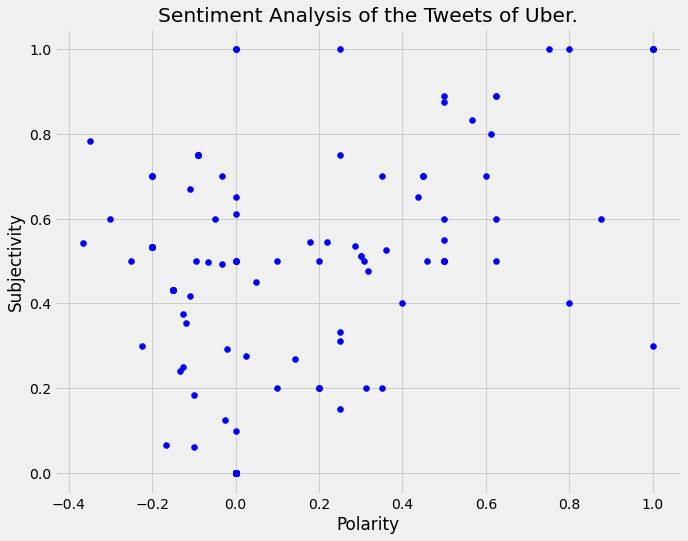

In [49]:
plt.figure(figsize=(10,8))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color="Blue")
    
plt.title("Sentiment Analysis of the Tweets of Uber.")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

### Get the percentage of Positive/Negative Tweets

In [62]:
ptweets = df[df.Analysis == "Positive"]
ptweets = ptweets['Tweets']

print(f" The percentage of Positive tweets are: {round(ptweets.shape[0] / df.shape[0] * 100, 1)}%")

 The percentage of Positive tweets are: 27.5%


In [64]:
ptweets = df[df.Analysis == "Negative"]
ptweets = ptweets['Tweets']

print(f" The percentage of Negative tweets are: {round(ptweets.shape[0] / df.shape[0] * 100, 1)}%")

 The percentage of Negative tweets are: 22.0%


In [65]:
ptweets = df[df.Analysis == "Neutral"]
ptweets = ptweets['Tweets']

print(f" The percentage of Neutral tweets are: {round(ptweets.shape[0] / df.shape[0] * 100, 1)}%")

 The percentage of Neutral tweets are: 50.5%


### Show the value counts:

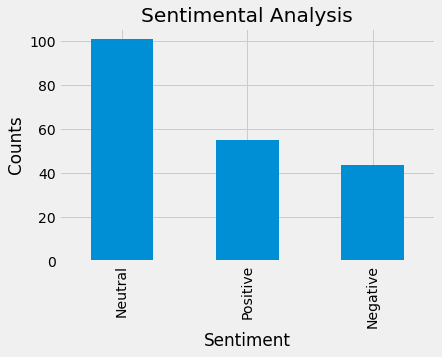

In [66]:
df['Analysis'].value_counts()

plt.title("Sentimental Analysis")
plt.xlabel("Sentiment")
plt.ylabel("Counts")
df['Analysis'].value_counts().plot(kind='bar')
plt.show()